<a href="https://colab.research.google.com/github/renataeugenia/Portfolio/blob/main/Notebook/Frexco_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frexco - Estágio em Data Analitycs - Desafio Tech

**O desafio é o seguinte:**

Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro.

Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.

Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes.

Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.

Tendo isso em mente, **estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias** do item, baseando-se no histórico presente na base de dados em anexo.

Obs: O modelo de previsão pode ser o que você julgue ser o melhor, mas **atenção aos detalhes de variação nas vendas**!

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy as sci
import statsmodels as stl

import warnings
warnings.filterwarnings('ignore')

In [83]:
print('versão pandas ->%s' % pd.__version__)
print('versão numpy ->%s' % np.__version__)
print('versão seaborn ->%s' % sns.__version__)
print('versão scipy ->%s' % sci.__version__)
print('versão statsmodels ->%s' % stl.__version__)

versão pandas ->1.3.5
versão numpy ->1.21.6
versão seaborn ->0.11.2
versão scipy ->1.7.3
versão statsmodels ->0.12.2


In [84]:
import statsmodels.api as sm

Leitura e visualização de dos dados

In [85]:
dados = pd.read_csv('Dados.csv', sep=';')
dados.head()

,Data,Vendas
0,6/12/2022,870.000
1,7/12/2022,868.000
2,8/12/2022,1.189
3,9/12/2022,742.000
4,10/12/2022,317.000


In [86]:
dados.describe()

,Vendas
count,46.000000
mean,374.685478
std,358.222241
min,1.009000
25%,1.375750
50%,303.000000
75%,734.500000
max,945.000000


In [87]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    46 non-null     object 
 1   Vendas  46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [88]:
dados.Data = pd.to_datetime(dados.Data)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 864.0 bytes


In [89]:
dados.set_index('Data', inplace=True)

In [90]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-06-12 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vendas  46 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


In [91]:
dados.head()

,Vendas
Data,
2022-06-12,870.000
2022-07-12,868.000
2022-08-12,1.189
2022-09-12,742.000
2022-10-12,317.000


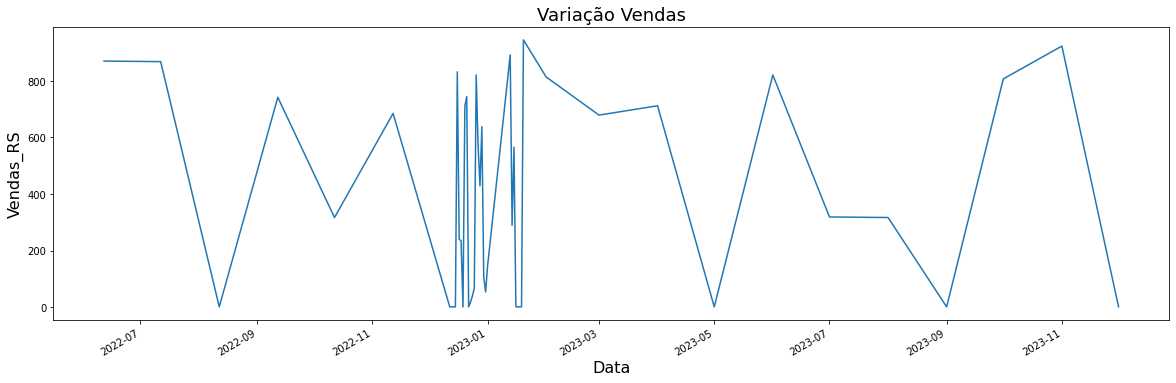

In [92]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_title('Variação Vendas', fontsize=18)
ax.set_ylabel('Vendas_RS', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['Vendas'].plot()

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [94]:
resultados = seasonal_decompose(dados, period=5)

In [95]:
y = dados['Vendas']
y.head()

Data
2022-06-12    870.000
2022-07-12    868.000
2022-08-12      1.189
2022-09-12    742.000
2022-10-12    317.000
Name: Vendas, dtype: float64

In [96]:
y.describe()

count     46.000000
mean     374.685478
std      358.222241
min        1.009000
25%        1.375750
50%      303.000000
75%      734.500000
max      945.000000
Name: Vendas, dtype: float64

In [97]:
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

(-6.637616898273641,
 5.511730478027591e-09,
 0,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 512.1579088341437)

In [98]:
print('p-valor:', adfuller(y.dropna())[1])

p-valor: 5.511730478027591e-09


In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Análise de diferenciação e manipulação dos dados

In [100]:
def plotarACF(y1,y2,y3):
  fig = plt.figure(figsize=(10,10))
  ax1 = fig.add_subplot(311)
  fig = plot_acf(y1,ax=ax1,title='Original')
  ax2 = fig.add_subplot(312)
  fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
  ax3 = fig.add_subplot(313)
  fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

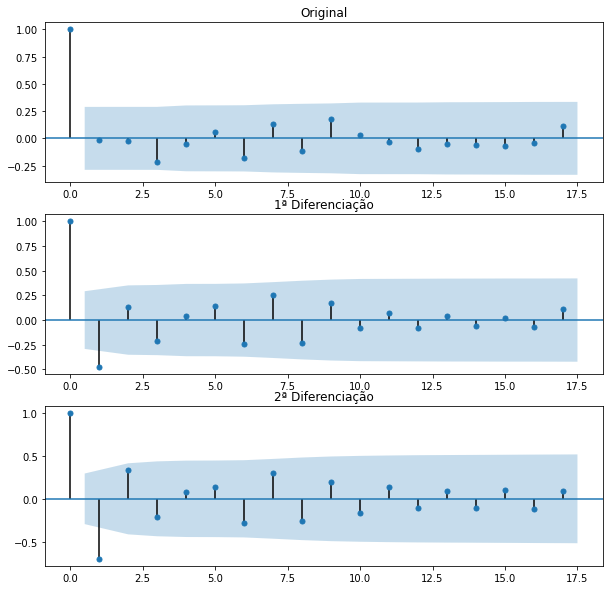

In [101]:
plotarACF(y,y.diff().dropna(), y.diff().diff().dropna())

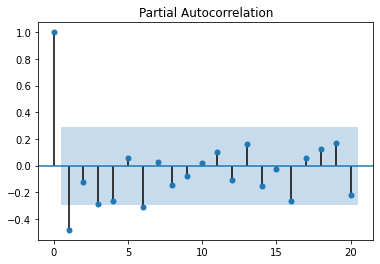

In [102]:
plot_pacf(y.diff().dropna(), lags=20);

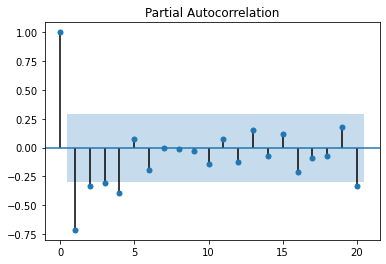

In [103]:
plot_pacf(y.diff().diff().dropna(), lags=20);

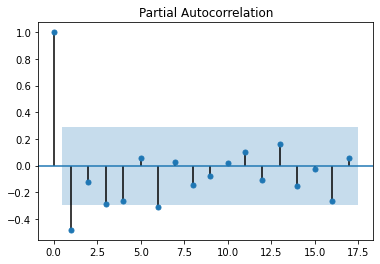

In [104]:
plot_pacf(y.diff().dropna());

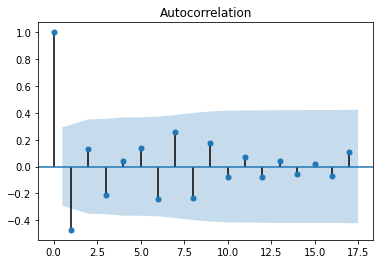

In [105]:
plot_acf(y.diff().dropna());

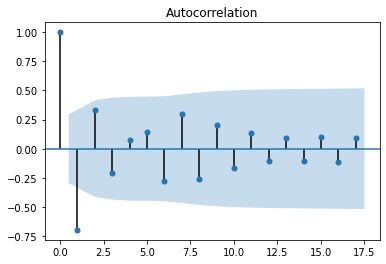

In [106]:
plot_acf(y.diff().diff().dropna());

Testando os modelos

## Arima (p = 1,d = 1,q = 1)

In [107]:
from statsmodels.tsa.arima_model import ARIMA

In [108]:
modelo = ARIMA(y,order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Vendas   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -330.415
Method:                       css-mle   S.D. of innovations            358.246
Date:                Sun, 05 Feb 2023   AIC                            668.829
Time:                        16:27:41   BIC                            676.056
Sample:                             1   HQIC                           671.523
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3230      3.996     -0.081      0.936      -8.154       7.509
ar.L1.D.Vendas     0.0046      0.157      0.029      0.977      -0.304       0.313
ma.L1.D.Vendas    -0.9999      0.066

## Sarima (Arima sazonal)

In [109]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
sazonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p,d,q))]

In [110]:
print('exemplo de combinação de parametros para o   ARIMA SAZONAL')
print('Sarimax: {} x {}'.format(pdq[0], sazonal_pdq[0]))
print('Sarimax: {} x {}'.format(pdq[0], sazonal_pdq[1]))
print('Sarimax: {} x {}'.format(pdq[0], sazonal_pdq[2]))

exemplo de combinação de parametros para o   ARIMA SAZONAL
Sarimax: (0, 0, 0) x (0, 0, 0, 5)
Sarimax: (0, 0, 0) x (0, 0, 1, 5)
Sarimax: (0, 0, 0) x (0, 1, 0, 5)


In [111]:
y = dados['Vendas']
y

Data
2022-06-12    870.000
2022-07-12    868.000
2022-08-12      1.189
2022-09-12    742.000
2022-10-12    317.000
2022-11-12    685.000
2022-12-12      1.366
2022-12-13      1.213
2022-12-14      1.055
2022-12-15      1.343
2022-12-16    832.000
2022-12-17    240.000
2022-12-18    235.000
2022-12-19      1.050
2022-12-20    711.000
2022-12-21    745.000
2022-12-22      1.009
2022-12-23     18.000
2022-12-24     40.000
2022-12-25     67.000
2022-12-26    821.000
2022-12-27    572.000
2022-12-28    429.000
2022-12-29    638.000
2022-12-30    106.000
2022-12-31     54.000
2023-01-01    144.000
2023-02-01    814.000
2023-03-01    679.000
2023-04-01    712.000
2023-05-01      1.229
2023-06-01    821.000
2023-07-01    319.000
2023-08-01    317.000
2023-09-01      1.317
2023-10-01    807.000
2023-11-01    923.000
2023-12-01      1.265
2023-01-13    892.000
2023-01-14    289.000
2023-01-15    566.000
2023-01-16      1.692
2023-01-17      1.097
2023-01-18      1.302
2023-01-19      1.405
2023-

In [112]:
aic_lista = []
for param in pdq:
  for param_sazonal in sazonal_pdq:
   mod = sm.tsa.statespace.SARIMAX(y,
                                   order=param,
                                   sazonal_order=param_sazonal) 
   results = mod.fit()
   aic_lista.append('Arima{} x {} - AIC {}'.format(param, param_sazonal, results.aic))

In [113]:
aic_lista

['Arima(0, 0, 0) x (0, 0, 0, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (0, 0, 1, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (0, 1, 0, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (0, 1, 1, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (1, 0, 0, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (1, 0, 1, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (1, 1, 0, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 0) x (1, 1, 1, 5) - AIC 707.1265566364315',
 'Arima(0, 0, 1) x (0, 0, 0, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (0, 0, 1, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (0, 1, 0, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (0, 1, 1, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (1, 0, 0, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (1, 0, 1, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (1, 1, 0, 5) - AIC 701.5964452934973',
 'Arima(0, 0, 1) x (1, 1, 1, 5) - AIC 701.5964452934973',
 'Arima(0, 1, 0) x (0, 0, 0, 5) - AIC 688.7355267697216',
 'Arima(0, 1, 

Criando o modelo final

In [114]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                               sazonal_order=(1,1,1,5))
results = mod.fit()

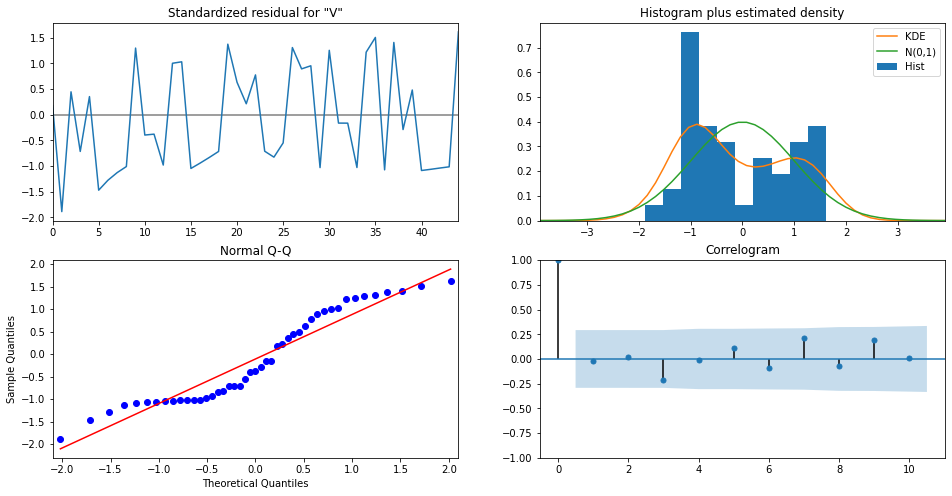

In [115]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

Prevendo a Demanda

In [116]:
pred = results.get_prediction(start=pd.to_datetime('2022-06-12'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic.head()

,lower Vendas,upper Vendas
Data,,
2022-06-12,-2197.145628,2197.145628
2022-07-12,-186.149230,1748.381616
2022-08-12,-29.833100,1674.309385
2022-09-12,-248.072316,1365.743199
2022-10-12,-179.628384,1385.758928


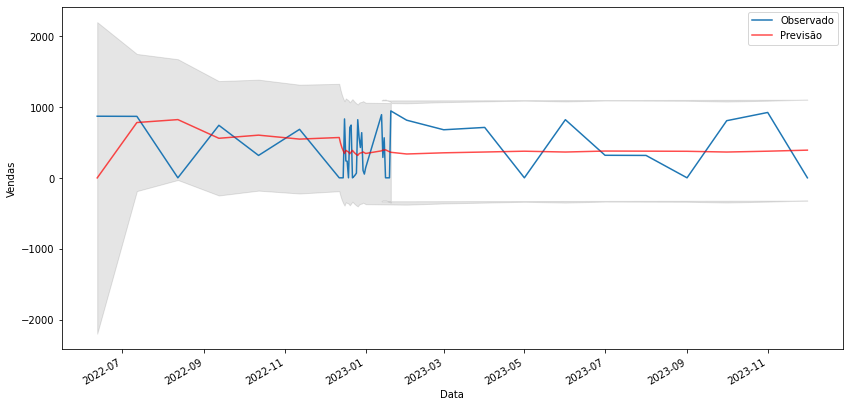

In [117]:
ax = y['2022':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data') 
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

In [118]:
pred_uc = results.get_forecast(steps=5)
pred_ic = pred_uc.conf_int()
pred_ic

,lower Vendas,upper Vendas
46,-336.044651,1083.080973
47,-335.803552,1083.309842
48,-335.803670,1083.309766
49,-335.803688,1083.309785
50,-335.803706,1083.309803
